In [304]:
import numpy as np
import pandas as pd
import seaborn as sbn
%matplotlib inline

In [305]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1>Exploring the Missing data:</h1>

In [306]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

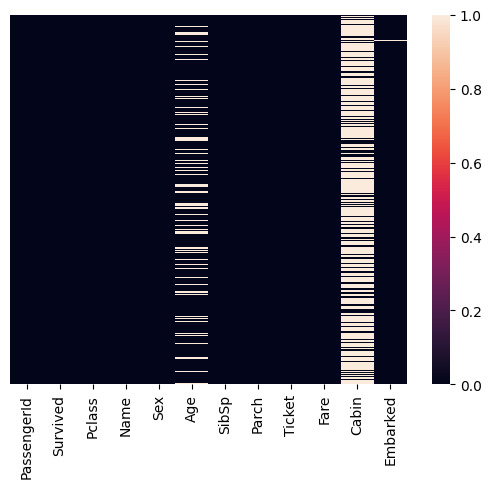

In [307]:
sbn.heatmap(data.isnull(),yticklabels=False)

<mark>Seaborn is used for better visualization of data as you can see above.</mark>

Let us work with more examples

<AxesSubplot:xlabel='Survived', ylabel='count'>

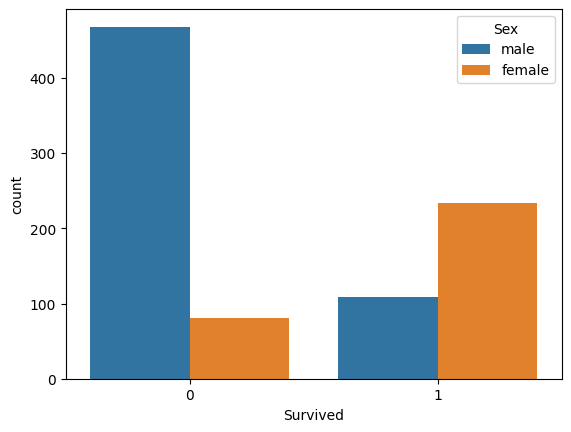

In [308]:
sbn.countplot(x="Survived", hue="Sex", data=data)

<mark>  0 - Not Survived <br>
        1 - Survived </mark> 

<AxesSubplot:xlabel='Survived', ylabel='count'>

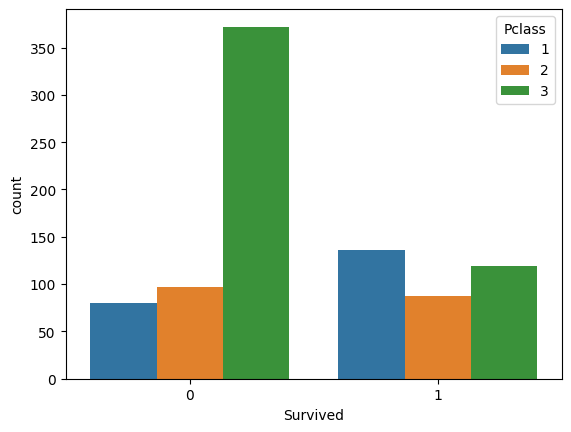

In [309]:
sbn.countplot(x="Survived", hue="Pclass", data=data)

<AxesSubplot:>

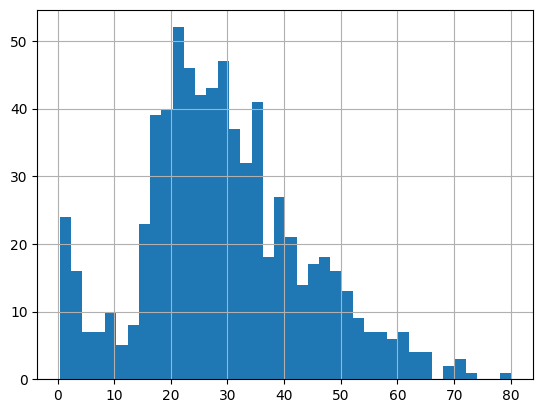

In [310]:
data['Age'].hist(bins=40)

<AxesSubplot:xlabel='Survived', ylabel='count'>

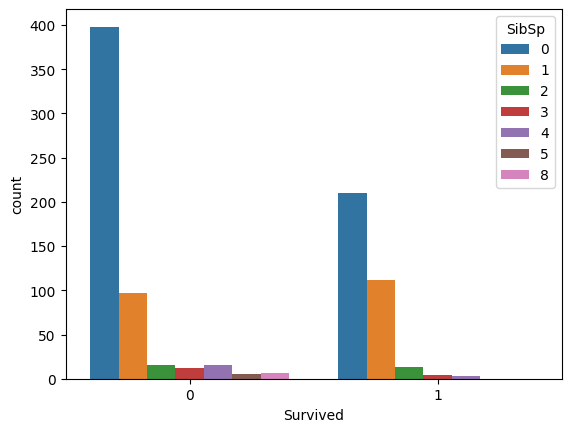

In [311]:
sbn.countplot(x="Survived", hue="SibSp", data=data)

<mark>This plot will help us to find the no. of people who are dead have either spouse or any siblings.</mark>

<AxesSubplot:xlabel='Survived', ylabel='count'>

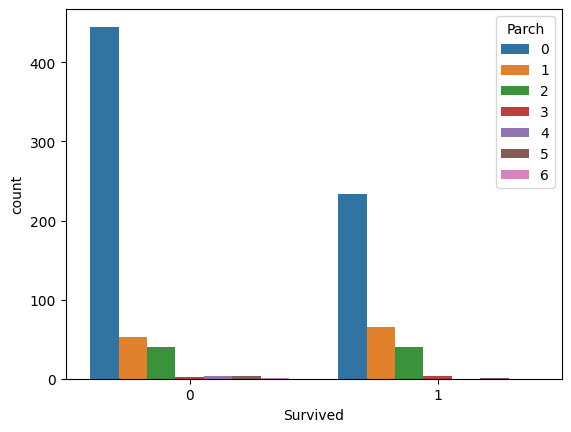

In [312]:
sbn.countplot(x="Survived", hue="Parch", data=data)

<mark> From both the data, we can see that most of the people who were dead were the ones who had no parents, children, spouse, siblings. </mark>

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

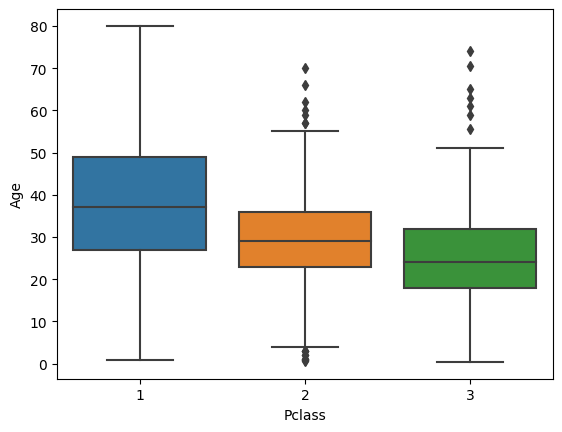

In [313]:
sbn.boxplot(x="Pclass", y="Age", data=data)

In [314]:
def Age_Update(List):
    Age = List[0]
    Pclass = List[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 27
    else:
        return Age

<AxesSubplot:>

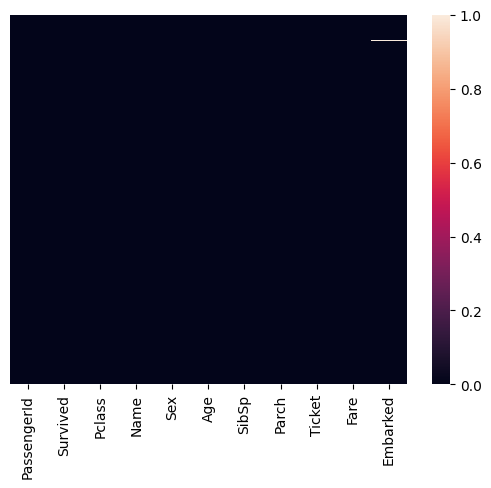

In [315]:
data['Age'] = data[['Age','Pclass']].apply(Age_Update, axis=1)
data.drop("Cabin", axis=1, inplace=True)
sbn.heatmap(data.isnull(),yticklabels=False)

Now let us clean the data:

If you see the data, then you can observe that the datatypes of some variables like sex, tickets are object. As variables like sex/embark have only two or three values, we can replace 
them with dummy variables in order to fit the data into our machine learning model. We can remove the variables name and ticket as they are of no use to us right now.

In [316]:
new_embark = pd.get_dummies(data['Embarked'], drop_first=True)
new_sex = pd.get_dummies(data['Sex'], drop_first=True)
data.drop(["Name","Sex","Ticket","Embarked"], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [317]:
data = pd.concat([data,new_embark,new_sex],axis=1)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


Let us split our data into training and test sets:

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [319]:
x_train, x_test, y_train, y_test= train_test_split(data.drop('Survived', axis=1),data["Survived"], test_size=0.30, random_state=101)
x_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S,male
520,521,1,30.0,0,0,93.5000,0,1,0
510,511,3,29.0,0,0,7.7500,1,0,1
446,447,2,13.0,0,1,19.5000,0,1,0
2,3,3,26.0,0,0,7.9250,0,1,0
691,692,3,4.0,0,1,13.4167,0,0,0


In [320]:
y_train.head()

520    1
510    1
446    1
2      1
691    1
Name: Survived, dtype: int64

Let us fit the model right now:

In [321]:
Model = LogisticRegression()
Model.fit(x_train, y_train)

c:\Users\akank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [322]:
predictions = Model.predict(x_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [323]:
ConfusionMatrix = confusion_matrix(y_test, predictions)
AccuracyScore = accuracy_score(y_test, predictions)
ClassificationReport = classification_report(y_test, predictions)
ConfusionMatrix


array([[134,  20],
       [ 42,  72]], dtype=int64)

In [324]:
AccuracyScore

0.7686567164179104

In [325]:
ClassificationReport

'              precision    recall  f1-score   support\n\n           0       0.76      0.87      0.81       154\n           1       0.78      0.63      0.70       114\n\n    accuracy                           0.77       268\n   macro avg       0.77      0.75      0.76       268\nweighted avg       0.77      0.77      0.76       268\n'

We have got a pretty decent f1_score. So, I hope this model is well suited for analysing the titanic data we had.